# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from seaborn import boxplot
pd.set_option('max_colwidth', 400)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Importing data

In [2]:
df=pd.read_pickle("../data/intermediate/zillow_Cleveland.pkl")

In [3]:
df_cp=df.reset_index(drop=True).copy()
df_cp.head()

,sale_date,lat,lng,floorsize_sqft,url,price,type,year_built,bedroom_cnt,full_bathroom_cnt,lot_size_sqft,partial_bathroom_cnt
0,2021-04-14,41.432756,-81.809063,1664.0,https://www.zillow.com/homedetails/4486-W-158th-St-Cleveland-OH-44135/33380420_zpid/,140000.0,SingleFamily,1952.0,4.0,1.0,6534.0,0.0
1,2021-04-14,41.435938,-81.821803,2616.0,https://www.zillow.com/homedetails/4384-Rocky-River-Dr-Cleveland-OH-44135/121949704_zpid/,240000.0,SingleFamily,1930.0,3.0,2.0,11326.0,1.0
2,2021-04-13,41.444511,-81.809595,2384.0,https://www.zillow.com/homedetails/4048-W-160th-St-Cleveland-OH-44135/33377879_zpid/,261000.0,SingleFamily,1946.0,4.0,3.0,4792.0,1.0
3,2021-04-13,41.461457,-81.800982,1170.0,https://www.zillow.com/homedetails/15000-Grapeland-Ave-Cleveland-OH-44111/33372613_zpid/,150000.0,SingleFamily,1948.0,3.0,1.0,4356.0,0.0
4,2021-04-09,41.436436,-81.788011,1422.0,https://www.zillow.com/homedetails/4331-W-138th-St-Cleveland-OH-44135/33369963_zpid/,120000.0,SingleFamily,1928.0,3.0,1.0,4792.0,0.0


In [4]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   sale_date             3271 non-null   datetime64[ns]
 1   lat                   3313 non-null   float64       
 2   lng                   3313 non-null   float64       
 3   floorsize_sqft        3063 non-null   float64       
 4   url                   3313 non-null   object        
 5   price                 3313 non-null   float64       
 6   type                  3307 non-null   object        
 7   year_built            3189 non-null   float64       
 8   bedroom_cnt           3170 non-null   float64       
 9   full_bathroom_cnt     2394 non-null   float64       
 10  lot_size_sqft         3061 non-null   float64       
 11  partial_bathroom_cnt  2393 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 310.7+ KB


In [5]:
df_cp.describe()

,lat,lng,floorsize_sqft,price,year_built,bedroom_cnt,full_bathroom_cnt,lot_size_sqft,partial_bathroom_cnt
count,3313.000000,3313.000000,3063.000000,3.313000e+03,3189.000000,3170.000000,2394.000000,3.061000e+03,2393.000000
mean,41.466305,-81.703747,1707.954620,1.203264e+05,1933.476325,3.397161,1.626149,7.048328e+03,0.264939
std,0.034141,0.089199,927.760393,3.987480e+05,28.961833,1.305494,0.739999,4.506795e+04,0.467161
min,41.418556,-81.840581,10.000000,1.250000e+02,1810.000000,0.000000,1.000000,1.100000e+01,0.000000
25%,41.441190,-81.787433,1174.000000,4.300000e+04,1915.000000,3.000000,1.000000,4.356000e+03,0.000000
50%,41.458147,-81.702997,1540.000000,8.100000e+04,1927.000000,3.000000,2.000000,4.792000e+03,0.000000
75%,41.479430,-81.614048,2033.500000,1.360000e+05,1950.000000,4.000000,2.000000,6.098000e+03,1.000000
max,41.590965,-81.538300,30150.000000,1.540000e+07,2021.000000,24.000000,7.000000,1.899216e+06,2.000000


Comment: 
- sqft max and min looks suspicious
- price max and min looks suspicious
- check min year
- bedroom_cnt max is suspicious

## Visualizing Numerical Features

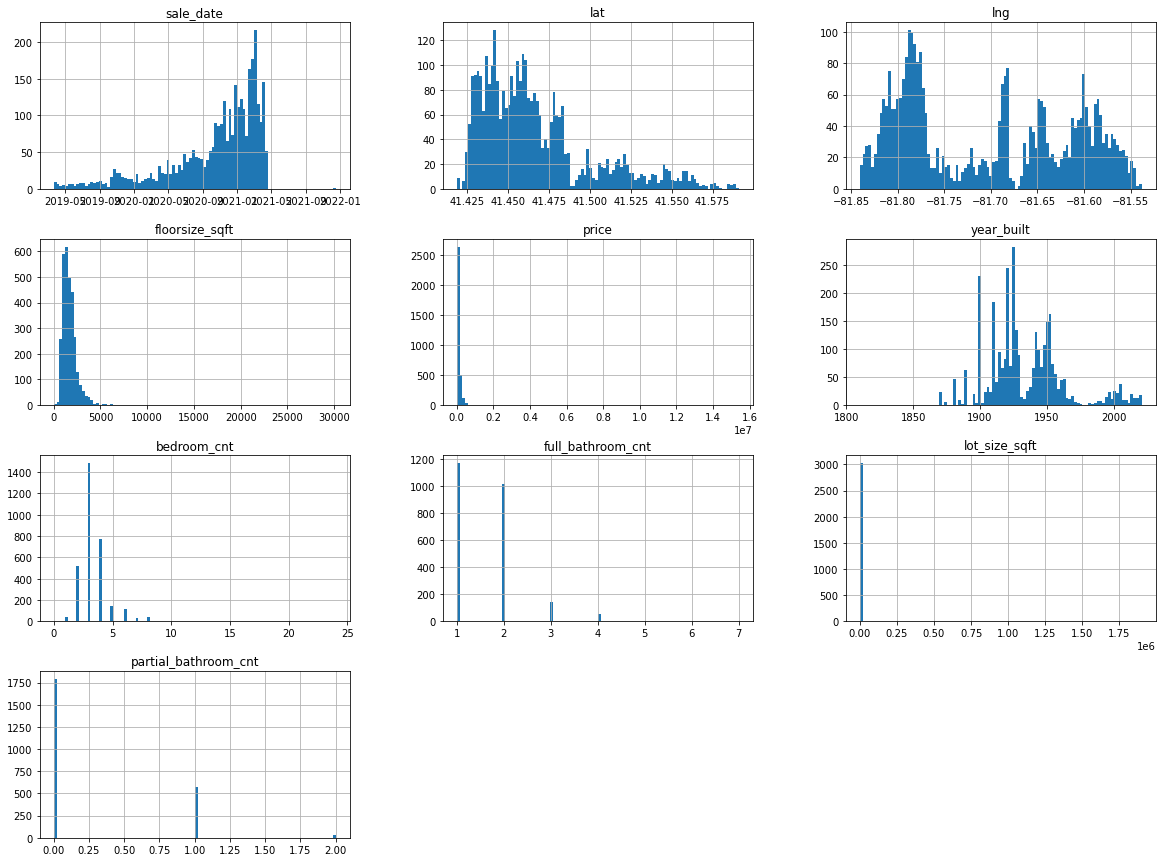

In [6]:
df_cp.hist(bins=100,figsize=(20,15))
plt.show()

##### Comment: There seem to be obvious outliers in our floorsize_sqft, price, year_built, bedroom_cnt  lot_size. We need to investigate those 

## Outlier analysis

### floorsize_sqft
We will convert this to m2 for clearer intuition and add price_per_floorsize_m2 feature

In [7]:
df_cp['floorsize_m2']= (df_cp.floorsize_sqft * 0.092903).round()
df_cp['price_per_floorsize_m2']= (df_cp['price']/df_cp['floorsize_m2']).round()

df_cp=df_cp.drop('floorsize_sqft',axis=1)

In [8]:
df_cp.head()

,sale_date,lat,lng,url,price,type,year_built,bedroom_cnt,full_bathroom_cnt,lot_size_sqft,partial_bathroom_cnt,floorsize_m2,price_per_floorsize_m2
0,2021-04-14,41.432756,-81.809063,https://www.zillow.com/homedetails/4486-W-158th-St-Cleveland-OH-44135/33380420_zpid/,140000.0,SingleFamily,1952.0,4.0,1.0,6534.0,0.0,155.0,903.0
1,2021-04-14,41.435938,-81.821803,https://www.zillow.com/homedetails/4384-Rocky-River-Dr-Cleveland-OH-44135/121949704_zpid/,240000.0,SingleFamily,1930.0,3.0,2.0,11326.0,1.0,243.0,988.0
2,2021-04-13,41.444511,-81.809595,https://www.zillow.com/homedetails/4048-W-160th-St-Cleveland-OH-44135/33377879_zpid/,261000.0,SingleFamily,1946.0,4.0,3.0,4792.0,1.0,221.0,1181.0
3,2021-04-13,41.461457,-81.800982,https://www.zillow.com/homedetails/15000-Grapeland-Ave-Cleveland-OH-44111/33372613_zpid/,150000.0,SingleFamily,1948.0,3.0,1.0,4356.0,0.0,109.0,1376.0
4,2021-04-09,41.436436,-81.788011,https://www.zillow.com/homedetails/4331-W-138th-St-Cleveland-OH-44135/33369963_zpid/,120000.0,SingleFamily,1928.0,3.0,1.0,4792.0,0.0,132.0,909.0


array([[<AxesSubplot:title={'center':'floorsize_m2'}>,
        <AxesSubplot:title={'center':'price_per_floorsize_m2'}>]],
      dtype=object)

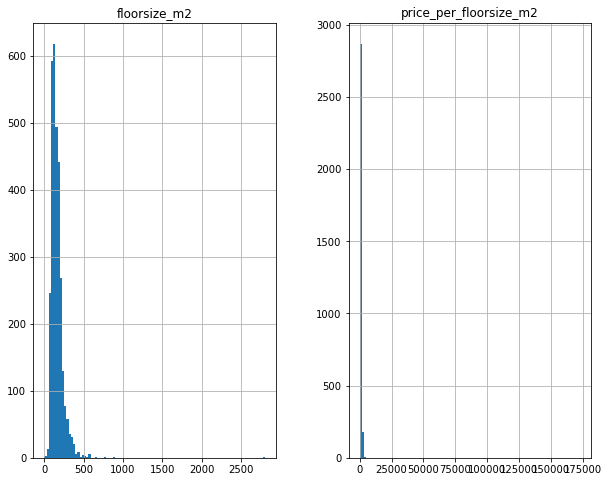

In [9]:
df_cp.hist(column=['floorsize_m2','price_per_floorsize_m2'],bins=100,figsize=(10,8))

##### There seem to be some listings with extreme m2 and price_per_floorsize_m2 

In [10]:
df_cp[['floorsize_m2','price_per_floorsize_m2']].describe()

,floorsize_m2,price_per_floorsize_m2
count,3063.000000,3063.000000
mean,158.664381,810.153771
std,86.195896,3252.337521
min,1.000000,1.000000
25%,109.000000,296.000000
50%,143.000000,601.000000
75%,189.000000,988.000000
max,2801.000000,173034.000000


In [11]:
median_m2=df_cp['floorsize_m2'].median()
median_m2

143.0

In [12]:
median_price=df_cp['price_per_floorsize_m2'].median()
median_price

601.0

In [13]:
df_cp[['url','floorsize_m2','price_per_floorsize_m2']].sort_values('price_per_floorsize_m2',ascending=True).head(5)

,url,floorsize_m2,price_per_floorsize_m2
3217,https://www.zillow.com/homedetails/3628-E-120th-St-Cleveland-OH-44105/33432538_zpid/,143.0,1.0
2991,https://www.zillow.com/homedetails/1770-Urbana-Rd-Cleveland-OH-44112/33404354_zpid/,268.0,3.0
573,https://www.zillow.com/homedetails/3301-W-165th-St-Cleveland-OH-44111/33371708_zpid/,301.0,4.0
3139,https://www.zillow.com/homedetails/11215-Miles-Ave-Cleveland-OH-44105/33431509_zpid/,155.0,4.0
2570,https://www.zillow.com/homedetails/6241-Hinde-Ave-Cleveland-OH-44127/33411901_zpid/,208.0,5.0


In [14]:
df_cp[['url','floorsize_m2','price_per_floorsize_m2']].sort_values('price_per_floorsize_m2',ascending=False).head(5)

,url,floorsize_m2,price_per_floorsize_m2
2928,https://www.zillow.com/homedetails/1211-Saint-Clair-Ave-308-Cleveland-OH-44114/90188767_zpid/,89.0,173034.0
1191,https://www.zillow.com/homedetails/12905-Guardian-Blvd-Cleveland-OH-44135/33362735_zpid/,1.0,23160.0
247,https://www.zillow.com/homedetails/14741-Lorain-Ave-Cleveland-OH-44111/134138368_zpid/,44.0,22727.0
2824,https://www.zillow.com/homedetails/1229-E-60th-St-Cleveland-OH-44103/33382162_zpid/,159.0,19811.0
2316,https://www.zillow.com/homedetails/5802-Prosser-Ave-Cleveland-OH-44103/33382154_zpid/,2.0,17000.0


In [15]:
df_cp[['url','floorsize_m2','price_per_floorsize_m2']].sort_values('floorsize_m2',ascending=True).head(5)

,url,floorsize_m2,price_per_floorsize_m2
1191,https://www.zillow.com/homedetails/12905-Guardian-Blvd-Cleveland-OH-44135/33362735_zpid/,1.0,23160.0
2316,https://www.zillow.com/homedetails/5802-Prosser-Ave-Cleveland-OH-44103/33382154_zpid/,2.0,17000.0
2328,https://www.zillow.com/homedetails/4320-E-167th-St-4G-Cleveland-OH-44128/63016989_zpid/,20.0,1425.0
247,https://www.zillow.com/homedetails/14741-Lorain-Ave-Cleveland-OH-44111/134138368_zpid/,44.0,22727.0
442,https://www.zillow.com/homedetails/14107-San-Diego-Ave-Cleveland-OH-44111/33366772_zpid/,45.0,773.0


In [16]:
df_cp[['url','floorsize_m2','price_per_floorsize_m2']].sort_values('floorsize_m2',ascending=False).head(5)

,url,floorsize_m2,price_per_floorsize_m2
2767,https://www.zillow.com/homedetails/1667-E-40th-St-Cleveland-OH-44103/134142333_zpid/,2801.0,64.0
1661,https://www.zillow.com/homedetails/7049-Superior-Ave-Cleveland-OH-44103/134142811_zpid/,870.0,195.0
1036,https://www.zillow.com/homedetails/13200-Puritas-Ave-Cleveland-OH-44135/299235079_zpid/,779.0,5494.0
2762,https://www.zillow.com/homedetails/1161-E-71st-St-Cleveland-OH-44103/134143245_zpid/,648.0,62.0
2785,https://www.zillow.com/homedetails/1898-E-66th-St-Cleveland-OH-44103/33406030_zpid/,585.0,67.0


##### Comment:
- https://www.zillow.com/homedetails/3628-E-120th-St-Cleveland-OH-44105/33432538_zpid/ shows that some listing had a misstyped price (too low), e.g 125$. These low values may also be rent.
- https://www.zillow.com/homedetails/1211-Saint-Clair-Ave-308-Cleveland-OH-44114/90188767_zpid/ shows that some listings had a misstyped price (too high), e.g. 15M while the zillow estimate is 168k
- https://www.zillow.com/homedetails/12905-Guardian-Blvd-Cleveland-OH-44135/33362735_zpid/ shows that there are some listings with missptyped sqft (too low)
- https://www.zillow.com/homedetails/1667-E-40th-St-Cleveland-OH-44103/134142333_zpid/ shows that there are listings with misstyped sqft (too high)



before filtering 3313
after filtering 2845


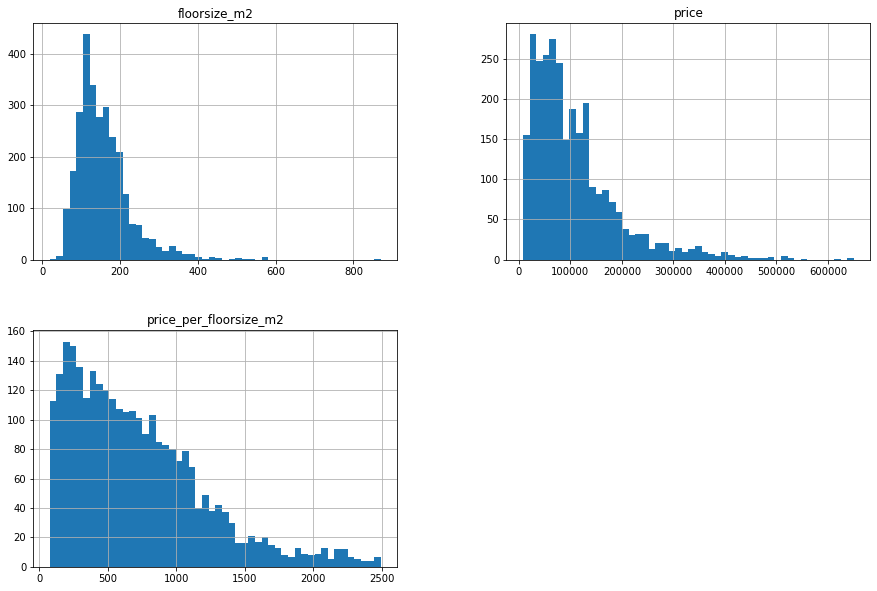

In [17]:
print('before filtering',len(df_cp))

q_low = df_cp["price_per_floorsize_m2"].quantile(0.05)
q_hi  = df_cp["price_per_floorsize_m2"].quantile(0.98)

df_tmp=df_cp.copy()
df_tmp = df_tmp[(df_tmp["price_per_floorsize_m2"] < q_hi) & (df_tmp["price_per_floorsize_m2"] > q_low)]

df_tmp.hist(column=['floorsize_m2','price','price_per_floorsize_m2'],bins=50,figsize=(15,10))

print('after filtering',len(df_tmp))

##### Comment: we may want to note q_low and q_hi values for outlier detection in our future production environment

In [18]:
print(q_low,q_hi)

76.0 2500.0


##### Comment: price_per_floorsize_m2 is now much better looking 

Checking outliers from 'floorsize_m2' plot.

In [19]:
df_tmp[['url','floorsize_m2','price_per_floorsize_m2']].sort_values('floorsize_m2',ascending=False).head(3)

,url,floorsize_m2,price_per_floorsize_m2
1661,https://www.zillow.com/homedetails/7049-Superior-Ave-Cleveland-OH-44103/134142811_zpid/,870.0,195.0
3203,https://www.zillow.com/homedetails/3438-E-140th-St-Cleveland-OH-44120/2077933710_zpid/,578.0,180.0
1689,https://www.zillow.com/homedetails/719-E-124th-St-Cleveland-OH-44108/2078665412_zpid/,578.0,275.0


https://www.zillow.com/homedetails/7049-Superior-Ave-Cleveland-OH-44103/134142811_zpid/ misses bathroom/bedroom data but it seems the m2 is accurate. It's the only outlier regarding m2

Checking min price_per_floorsize_m2 one more time

In [20]:
df_tmp[['price','floorsize_m2','price_per_floorsize_m2']].describe()

,price,floorsize_m2,price_per_floorsize_m2
count,2845.000000,2845.000000,2845.000000
mean,106881.657996,156.700176,717.685764
std,85059.872081,69.397040,489.482357
min,8000.000000,20.000000,77.000000
25%,48000.000000,109.000000,329.000000
50%,84900.000000,143.000000,623.000000
75%,135000.000000,187.000000,985.000000
max,650000.000000,870.000000,2491.000000


In [21]:
df_tmp[['url','price','floorsize_m2','price_per_floorsize_m2']].sort_values('price_per_floorsize_m2',ascending=True).head()

,url,price,floorsize_m2,price_per_floorsize_m2
1064,https://www.zillow.com/homedetails/12422-Grimsby-Ave-Cleveland-OH-44135/33363097_zpid/,10000.0,130.0,77.0
912,https://www.zillow.com/homedetails/4193-W-130th-St-Cleveland-OH-44135/96369225_zpid/,13000.0,169.0,77.0
2723,https://www.zillow.com/homedetails/5909-Cable-Ave-Cleveland-OH-44127/33411765_zpid/,14000.0,182.0,77.0
1797,https://www.zillow.com/homedetails/3550-E-113th-St-Cleveland-OH-44105/33429408_zpid/,14900.0,193.0,77.0
2787,https://www.zillow.com/homedetails/1404-E-45th-St-Cleveland-OH-44103/33381817_zpid/,22000.0,283.0,78.0


##### Low price_per_floorsize_m2 seems to be tied to old looking properties which makes sense

In [22]:
df_filtered=df_tmp.copy()

In [23]:
len(df_filtered)

2845

### year_built

In [24]:
df_tmp.sort_values('year_built',ascending=True).head()

,sale_date,lat,lng,url,price,type,year_built,bedroom_cnt,full_bathroom_cnt,lot_size_sqft,partial_bathroom_cnt,floorsize_m2,price_per_floorsize_m2
912,2020-08-17,41.440717,-81.779470,https://www.zillow.com/homedetails/4193-W-130th-St-Cleveland-OH-44135/96369225_zpid/,13000.0,SingleFamily,1854.0,4.0,NaN,8407.0,NaN,169.0,77.0
2841,2019-12-26,41.480997,-81.687998,https://www.zillow.com/homedetails/2258-Literary-Rd-Cleveland-OH-44113/144420258_zpid/,280000.0,SingleFamily,1860.0,NaN,NaN,7623.0,NaN,204.0,1373.0
2616,2020-09-11,41.464431,-81.652110,https://www.zillow.com/homedetails/3450-E-55th-St-Cleveland-OH-44127/33421833_zpid/,51900.0,SingleFamily,1865.0,6.0,NaN,4791.0,NaN,186.0,279.0
2249,2021-01-19,41.453349,-81.639944,https://www.zillow.com/homedetails/7000-Hosmer-Ave-Cleveland-OH-44105/33424061_zpid/,50000.0,MultiFamily,1867.0,4.0,2.0,5201.0,0.0,167.0,299.0
2761,2020-04-23,41.479660,-81.681805,https://www.zillow.com/homedetails/2469-W-7th-St-Cleveland-OH-44113/33331247_zpid/,320000.0,SingleFamily,1870.0,3.0,2.0,NaN,0.0,203.0,1576.0


### bedroom_count

In [25]:
df_tmp.sort_values('bedroom_cnt',ascending=False).head()

,sale_date,lat,lng,url,price,type,year_built,bedroom_cnt,full_bathroom_cnt,lot_size_sqft,partial_bathroom_cnt,floorsize_m2,price_per_floorsize_m2
1279,2021-04-09,41.469587,-81.693656,https://www.zillow.com/homedetails/3115-W-16th-St-Cleveland-OH-44109/2122367531_zpid/,418500.0,MultiFamily,1880.0,24.0,7.0,NaN,1.0,249.0,1681.0
1228,2021-04-15,41.540603,-81.604095,https://www.zillow.com/homedetails/616-E-117th-St-Cleveland-OH-44108/2097305513_zpid/,159000.0,MultiFamily,1920.0,12.0,4.0,4792.0,0.0,528.0,301.0
2425,2020-12-23,41.540660,-81.599532,https://www.zillow.com/homedetails/603-E-123rd-St-Cleveland-OH-44108/2076968960_zpid/,80000.0,MultiFamily,1920.0,12.0,4.0,6098.0,0.0,425.0,188.0
2474,NaT,41.483644,-81.718549,https://www.zillow.com/homedetails/1811-W-47th-St-Cleveland-OH-44102/2081931214_zpid/,335000.0,MultiFamily,1900.0,10.0,5.0,5663.0,0.0,399.0,840.0
1594,2021-03-08,41.451144,-81.704710,https://www.zillow.com/homedetails/3815-W-33rd-St-Cleveland-OH-44109/33353421_zpid/,81000.0,MultiFamily,1895.0,10.0,2.0,13068.0,1.0,310.0,261.0


In https://www.zillow.com/homedetails/3115-W-16th-St-Cleveland-OH-44109/2122367531_zpid/ bedroom count is off. Lets inspect it better with a new feature: floorsize_m2_per_bedroom

In [26]:
df_tmp['floorsize_m2_per_bedroom']= (df_tmp['floorsize_m2']/df_tmp['bedroom_cnt']).round()

In [27]:
df_tmp[df_tmp['floorsize_m2_per_bedroom']==float('inf')]=None

array([[<AxesSubplot:title={'center':'floorsize_m2_per_bedroom'}>]],
      dtype=object)

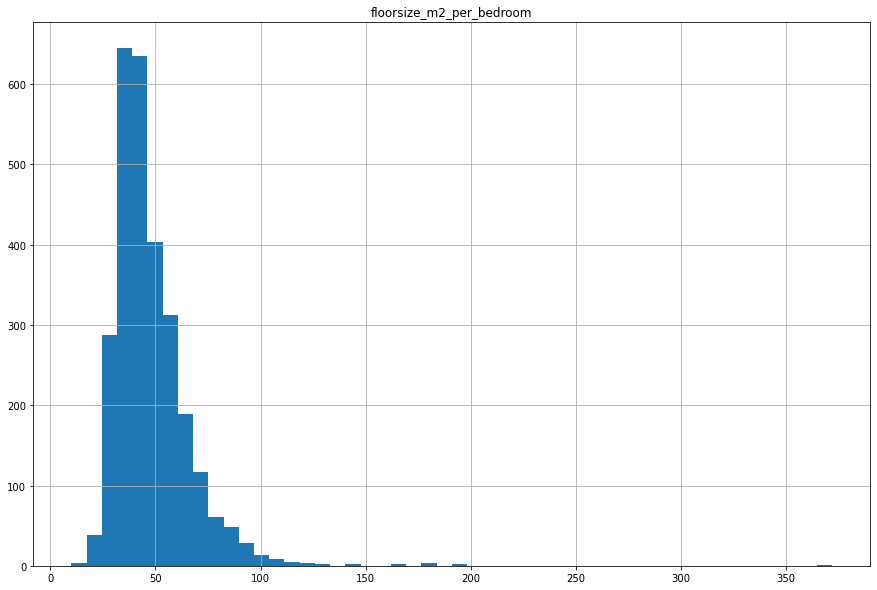

In [28]:
df_tmp.hist(column=['floorsize_m2_per_bedroom'],bins=50,figsize=(15,10))


In [29]:
df_tmp['floorsize_m2_per_bedroom'].describe()

count    2814.000000
mean       47.563255
std        18.504121
min        10.000000
25%        36.000000
50%        44.000000
75%        55.000000
max       372.000000
Name: floorsize_m2_per_bedroom, dtype: float64

In [30]:
df_tmp['floorsize_m2_per_bedroom'].median()

44.0

In [31]:
df_tmp[['url','floorsize_m2_per_bedroom']].sort_values('floorsize_m2_per_bedroom',ascending=True).head()

,url,floorsize_m2_per_bedroom
1279,https://www.zillow.com/homedetails/3115-W-16th-St-Cleveland-OH-44109/2122367531_zpid/,10.0
1811,https://www.zillow.com/homedetails/16315-Harvard-Ave-Cleveland-OH-44128/33439574_zpid/,16.0
2842,https://www.zillow.com/homedetails/1611-E-33rd-St-Cleveland-OH-44114/33381289_zpid/,16.0
2507,https://www.zillow.com/homedetails/5512-Carry-Ave-Cleveland-OH-44103/33382862_zpid/,17.0
2016,https://www.zillow.com/homedetails/3788-E-142nd-St-Cleveland-OH-44128/33437206_zpid/,19.0


We will drop:
- https://www.zillow.com/homedetails/3115-W-16th-St-Cleveland-OH-44109/2122367531_zpid/

In [32]:
df_tmp=df_tmp[df_tmp['floorsize_m2_per_bedroom']!=10]

In [33]:
df_tmp=df_tmp[df_tmp['floorsize_m2_per_bedroom']<=150]

### Lot size

We will also convert lot_size_sqftfrom sqft to m2

In [34]:
df_tmp['lot_size_m2']= (df_tmp.lot_size_sqft* 0.092903).round()
df_tmp=df_tmp.drop('lot_size_sqft',axis=1)

array([[<AxesSubplot:title={'center':'lot_size_m2'}>]], dtype=object)

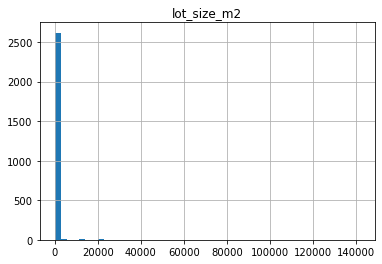

In [35]:
df_tmp.hist(['lot_size_m2'], bins=50)

In [36]:
df_tmp[['url','lot_size_m2']].sort_values('lot_size_m2',ascending=False)

,url,lot_size_m2
1006,https://www.zillow.com/homedetails/12127-Erwin-Ave-Cleveland-OH-44135/33364313_zpid/,141640.0
2138,https://www.zillow.com/homedetails/815-Overlook-Ridge-Dr-B-Cleveland-OH-44109/2084617343_zpid/,22136.0
1750,https://www.zillow.com/homedetails/815-Overlook-Ridge-Dr-B-Cleveland-OH-44109/134101462_zpid/,22136.0
1489,https://www.zillow.com/homedetails/836-Overlook-Ridge-Dr-836-Cleveland-OH-44109/134101468_zpid/,22136.0
1265,https://www.zillow.com/homedetails/4212-River-Ridge-Dr-D-Cleveland-OH-44109/2121501247_zpid/,22136.0
3156,https://www.zillow.com/homedetails/13705-Shaker-Blvd-APT-1A-Cleveland-OH-44120/33446478_zpid/,12707.0
3058,https://www.zillow.com/homedetails/13805-Shaker-Blvd-APT-4B-Cleveland-OH-44120/33446513_zpid/,12707.0
3254,https://www.zillow.com/homedetails/13705-Shaker-Blvd-APT-1A-Cleveland-OH-44120/2089858533_zpid/,12707.0
3248,https://www.zillow.com/homedetails/13801-Shaker-Blvd-APT-2B-Cleveland-OH-44120/33446503_zpid/,12707.0
1968,https://www.zillow.com/homedetails/13800-Shaker-Blvd-APT-1102-Cleveland-OH-44120/33446609_zpid/,5423.0


Listing https://www.zillow.com/homedetails/12127-Erwin-Ave-Cleveland-OH-44135/33364313_zpid/ is for example very unrealistic. We will drop all above 2000

In [37]:
df_tmp=df_tmp[df_tmp['lot_size_m2']<=2000]

## Visualizing Numerical Features after removing outliers

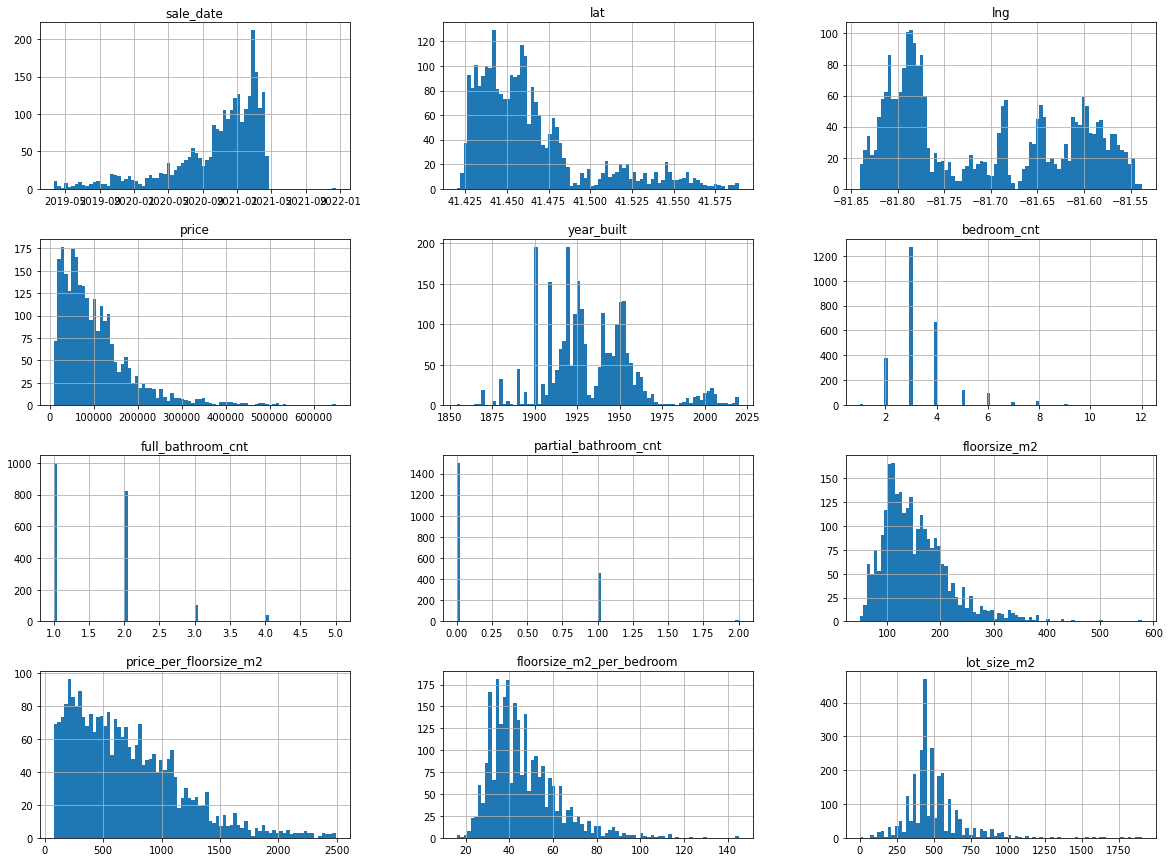

In [38]:
df_tmp.hist(bins=80,figsize=(20,15))
plt.show()

In [39]:
df_filtered=df_tmp.copy()

## Visualizing Geographical Data

### 2D

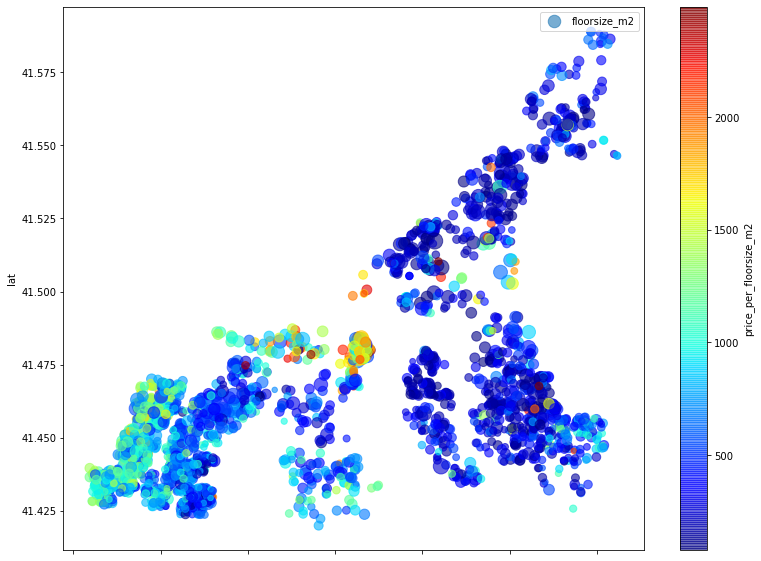

In [40]:
df_filtered.plot(
    kind='scatter',
    x='lng',
    y='lat',
    alpha=0.6,
    s=df_filtered['floorsize_m2']/2,
    c='price_per_floorsize_m2',
    label='floorsize_m2',
    cmap=plt.get_cmap('jet'),
    figsize=(13,10)
    )
plt.legend()

##### Comment: Location is an important factor for price prediction as expected

## Visualizing price and type relationship

<AxesSubplot:xlabel='type', ylabel='price'>

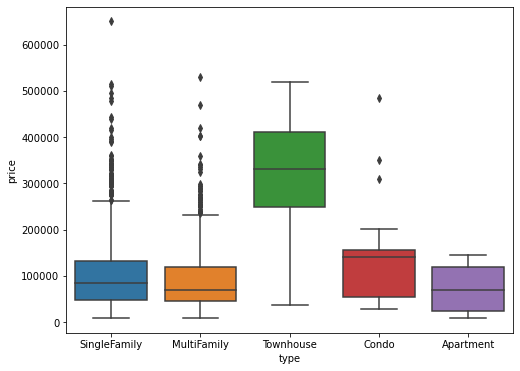

In [41]:
fig,ax=plt.subplots(figsize=(8,6))
boxplot( x=df_filtered.type,y=df_filtered.price)

## Correlations

In [42]:
from pandas.plotting import scatter_matrix

In [43]:
corr_matrix=df_filtered.corr()
corr_matrix['price'].sort_values(ascending=False)

price                       1.000000
price_per_floorsize_m2      0.810207
floorsize_m2_per_bedroom    0.378228
partial_bathroom_cnt        0.336359
floorsize_m2                0.318576
full_bathroom_cnt           0.307140
year_built                  0.195875
bedroom_cnt                 0.059410
lot_size_m2                 0.056691
lat                        -0.050485
lng                        -0.286650
Name: price, dtype: float64

##### Comment: 

In [44]:
attributes=['price', 'year_built','bedroom_cnt', 'floorsize_m2', 'price_per_floorsize_m2', 'floorsize_m2_per_bedroom', 'lot_size_m2']

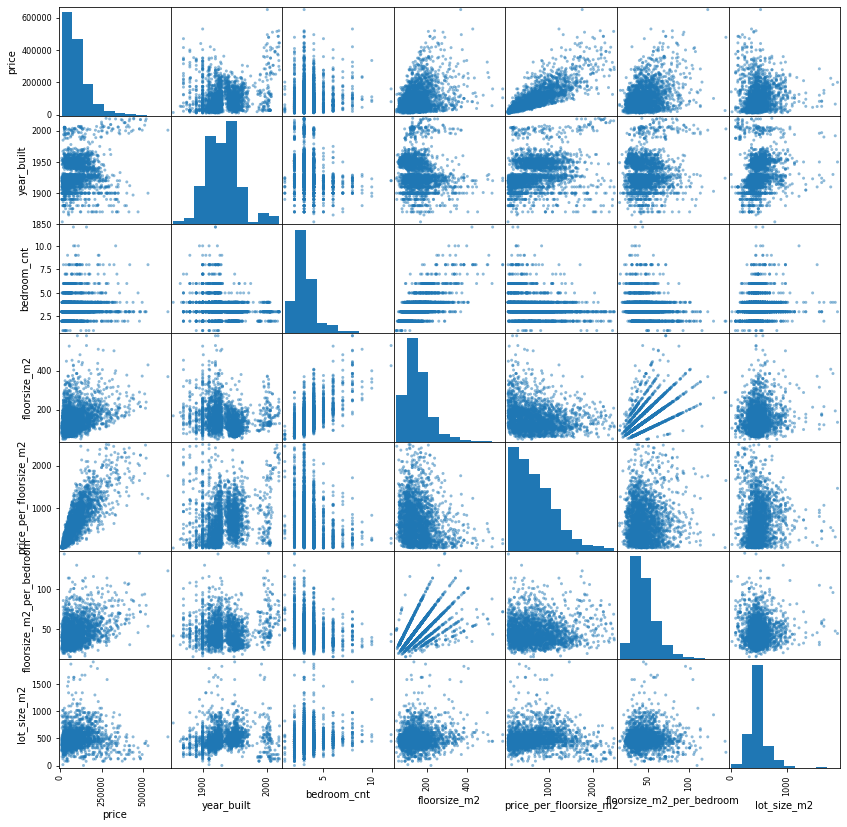

In [45]:
scatter_matrix(df_filtered[attributes],figsize=(14,14))
plt.show()

## Reformatting the date column

In [46]:
df_filtered=df_filtered.reset_index(drop=True)
df_filtered.head()

,sale_date,lat,lng,url,price,type,year_built,bedroom_cnt,full_bathroom_cnt,partial_bathroom_cnt,floorsize_m2,price_per_floorsize_m2,floorsize_m2_per_bedroom,lot_size_m2
0,2021-04-14,41.432756,-81.809063,https://www.zillow.com/homedetails/4486-W-158th-St-Cleveland-OH-44135/33380420_zpid/,140000.0,SingleFamily,1952.0,4.0,1.0,0.0,155.0,903.0,39.0,607.0
1,2021-04-14,41.435938,-81.821803,https://www.zillow.com/homedetails/4384-Rocky-River-Dr-Cleveland-OH-44135/121949704_zpid/,240000.0,SingleFamily,1930.0,3.0,2.0,1.0,243.0,988.0,81.0,1052.0
2,2021-04-13,41.444511,-81.809595,https://www.zillow.com/homedetails/4048-W-160th-St-Cleveland-OH-44135/33377879_zpid/,261000.0,SingleFamily,1946.0,4.0,3.0,1.0,221.0,1181.0,55.0,445.0
3,2021-04-13,41.461457,-81.800982,https://www.zillow.com/homedetails/15000-Grapeland-Ave-Cleveland-OH-44111/33372613_zpid/,150000.0,SingleFamily,1948.0,3.0,1.0,0.0,109.0,1376.0,36.0,405.0
4,2021-04-09,41.436436,-81.788011,https://www.zillow.com/homedetails/4331-W-138th-St-Cleveland-OH-44135/33369963_zpid/,120000.0,SingleFamily,1928.0,3.0,1.0,0.0,132.0,909.0,44.0,445.0


In [47]:
df_filtered['sale_year']=df_filtered['sale_date'].dt.year
df_filtered['sale_month']=df_filtered['sale_date'].dt.month
df_filtered['sale_day']=df_filtered['sale_date'].dt.day

In [48]:
corr_matrix=df_filtered.corr()
corr_matrix['price'].sort_values(ascending=False)

price                       1.000000
price_per_floorsize_m2      0.810207
floorsize_m2_per_bedroom    0.378228
partial_bathroom_cnt        0.336359
floorsize_m2                0.318576
full_bathroom_cnt           0.307140
year_built                  0.195875
sale_month                  0.061143
bedroom_cnt                 0.059410
lot_size_m2                 0.056691
sale_day                    0.032791
sale_year                  -0.024201
lat                        -0.050485
lng                        -0.286650
Name: price, dtype: float64

## Drop variables not needed

In [49]:
df_filtered=df_filtered.drop(['price_per_floorsize_m2','url','sale_date'],axis=1)

In [50]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616 entries, 0 to 2615
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lat                       2616 non-null   float64
 1   lng                       2616 non-null   float64
 2   price                     2616 non-null   float64
 3   type                      2616 non-null   object 
 4   year_built                2606 non-null   float64
 5   bedroom_cnt               2616 non-null   float64
 6   full_bathroom_cnt         1975 non-null   float64
 7   partial_bathroom_cnt      1975 non-null   float64
 8   floorsize_m2              2616 non-null   float64
 9   floorsize_m2_per_bedroom  2616 non-null   float64
 10  lot_size_m2               2616 non-null   float64
 11  sale_year                 2578 non-null   float64
 12  sale_month                2578 non-null   float64
 13  sale_day                  2578 non-null   float64
dtypes: float

## Generate Features Function

In [51]:
#useful in production
def generate_features(df):
    df['floorsize_m2_per_bedroom']= (df['floorsize_m2']/df['bedroom_cnt']).round()
    df['sale_year']=df['sale_date'].dt.year
    df['sale_month']=df['sale_date'].dt.month
    df['sale_day']=df['sale_date'].dt.day
    
    return df

## Exporting

In [52]:
df_filtered.columns

Index(['lat', 'lng', 'price', 'type', 'year_built', 'bedroom_cnt',
       'full_bathroom_cnt', 'partial_bathroom_cnt', 'floorsize_m2',
       'floorsize_m2_per_bedroom', 'lot_size_m2', 'sale_year', 'sale_month',
       'sale_day'],
      dtype='object')

In [55]:
df_filtered.describe()

,lat,lng,price,year_built,bedroom_cnt,full_bathroom_cnt,partial_bathroom_cnt,floorsize_m2,floorsize_m2_per_bedroom,lot_size_m2,sale_year,sale_month,sale_day
count,2616.000000,2616.000000,2616.000000,2606.000000,2616.000000,1975.000000,1975.000000,2616.000000,2616.000000,2616.000000,2578.000000,2578.000000,2578.000000
mean,41.463827,-81.708920,102257.114679,1932.421335,3.431957,1.594430,0.249620,155.407492,46.208716,492.099771,2020.337471,6.139643,15.958107
std,0.033882,0.091111,78481.488178,26.240168,1.188840,0.703205,0.453478,66.404363,15.392482,182.133121,0.619312,3.959914,8.915319
min,41.419946,-81.840579,9000.000000,1854.000000,1.000000,1.000000,0.000000,49.000000,16.000000,1.000000,2019.000000,1.000000,1.000000
25%,41.440139,-81.790672,47000.000000,1916.000000,3.000000,1.000000,0.000000,109.000000,35.000000,405.000000,2020.000000,3.000000,8.000000
50%,41.455616,-81.726756,82500.000000,1927.000000,3.000000,1.000000,0.000000,142.000000,43.000000,445.000000,2020.000000,5.000000,16.000000
75%,41.474291,-81.614879,132000.000000,1950.000000,4.000000,2.000000,0.000000,187.000000,54.000000,567.000000,2021.000000,10.000000,24.000000
max,41.588983,-81.538300,650000.000000,2020.000000,12.000000,5.000000,2.000000,578.000000,145.000000,1902.000000,2021.000000,12.000000,31.000000


In [53]:
df_filtered.to_pickle("../data/processed/zillow_Cleveland_clean.pkl")